In [79]:
#take the raw data in 'train.csv' (downloaded from https://www.kaggle.com/c/Kannada-MNIST/data?select=train.csv)
#read all of the data into lists
import csv
flat_ims = []
labels = []
with open('train.csv') as csvfile:
  reader = csv.reader(csvfile)
  next(reader)
  for row in reader:
    labels.append(int(row[0]))
    flat_ims.append(row[1:])
print(len(flat_ims))
print(len(labels))

60000
60000


In [0]:
#convert the list of flat images into a reshaped numpy array of 2D images (i.e. 2D array of numbers)
import numpy as np
import matplotlib.pyplot as plt

num_ims = np.array([np.array(some_image, dtype=np.float32).reshape(28,28) for some_image in flat_ims])

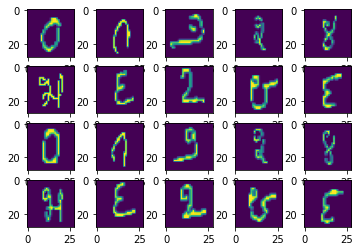

In [82]:
#visualize some images
f, ax = plt.subplots(4, 5)
for i in range(4):
  for j in range(5):
    ax[i, j].imshow(num_ims[5*i + j])

In [0]:
#convert labels into a numpy array
#normalize the images so that they are easier to feed into a neural net
labels = np.array(labels)
num_ims = num_ims / 255.0

In [0]:
#split into testing and training sets
percent_train = 0.8 #use 80% of the data for training and the rest for validation
len_train = int(percent_train * len(num_ims))

train_ims = np.array(num_ims[:len_train])
train_ims = train_ims.reshape(len(train_ims), 28, 28, 1)

train_labels = np.array(labels[:len_train])

test_ims = np.array(num_ims[len_train:])
test_ims = test_ims.reshape(len(test_ims), 28, 28, 1)

test_labels = np.array(labels[len_train:])

In [0]:
#import the tensorflow library to use Keras
import tensorflow as tf

In [86]:
#define a Convolutional Neural Network with 
#1 convolutional layer
#1 layer to halve the size of the image
#1 layer to flatten the image to feed to DNN
#1 Dense layer
#the output layer
model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3,3), input_shape = (28,28, 1), activation='relu'),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                346176    
_________________________________________________________________
dense_25 (Dense)             (None, 10)                650       
Total params: 347,146
Trainable params: 347,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
#compile the model
#specify the appropriate loss and optimizer
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [88]:
#train for 5 epochs only to avoid overfitting
history = model.fit(train_ims, train_labels, epochs=5, validation_data=(test_ims, test_labels))

Epoch 1/5
1500/1500 [==============================] - 32s 21ms/step - loss: 0.1238 - accuracy: 0.9655 - val_loss: 0.0521 - val_accuracy: 0.9833
Epoch 2/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0361 - accuracy: 0.9891 - val_loss: 0.0300 - val_accuracy: 0.9894
Epoch 3/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0239 - val_accuracy: 0.9921
Epoch 4/5
1500/1500 [==============================] - 28s 19ms/step - loss: 0.0148 - accuracy: 0.9950 - val_loss: 0.0348 - val_accuracy: 0.9893
Epoch 5/5
1500/1500 [==============================] - 28s 18ms/step - loss: 0.0100 - accuracy: 0.9971 - val_loss: 0.0241 - val_accuracy: 0.9929


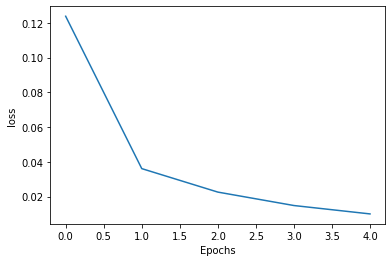

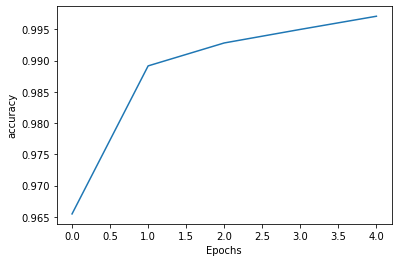

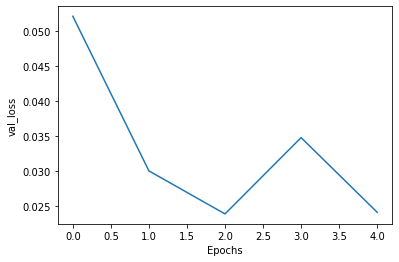

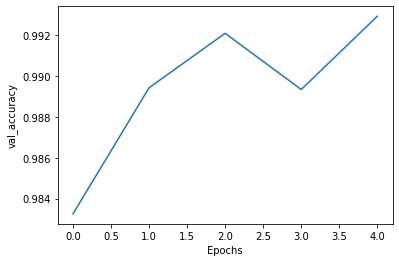

In [91]:
#visualize a plot of the accuracy, loss, and the validation accuracy and validation loss
def plot_graph_for(metric):
  plt.plot(history.history[metric])
  plt.xlabel('Epochs')
  plt.ylabel(metric)
  plt.show()
plot_graph_for('loss')
plot_graph_for('accuracy')
plot_graph_for('val_loss')
plot_graph_for('val_accuracy')